In [1]:
import pandas as pd
from opytex import texenv
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")

# Informations sur le devoir

In [2]:
ds_name = "BB_16_02_15"
classe = "309"

latex_info = {}
latex_info['titre'] =  "Brevet Blanc Février"
latex_info['classe'] = "309"
latex_info['date'] = "15 février 2016"
latex_info

{'classe': '309', 'date': '15 février 2016', 'titre': 'Brevet Blanc Février'}

# Import et premiers traitements

In [3]:
notes = pd.ExcelFile("./../../../../notes/"+classe+".xlsx")
notes.sheet_names
notes = notes.parse(ds_name)

In [4]:
ds_name = "Brevet blanc Fevrier"

In [5]:
notes.index

Index(['Brevet blanc Fevrier', 'Présentation', 'Exercice 1',
       'Comprendre le programme de calcul', 'Programme à l'envers',
       'Calcul literral', 'Exercice 2', 'Construction', 'Pythagore',
       'Choix proposition', 'Exercice 3', 'Exercice 4',
       'Probabilité « normale »', 'Probabilité « changement »', '2 épreuves',
       'Exercice 5', 'Divisibilité', 'PGCD', 'Réduction', 'Divisibilité',
       'Utilisation du PGCD', 'Exercice 6', 'Extraire l'information',
       'Argumentation', 'Résolution', 'Exercice 7', 'Lecture graphique',
       'Moyenne', 'Total', 'Formule tableur (somme)',
       'Formule tableur (moiyenne)'],
      dtype='object')

In [6]:
notes = notes.T

In [7]:
#notes = notes.drop('av_arrondi', axis=1)
#notes = notes.drop('num_sujet', axis=1)

In [8]:
barem = notes[:1]
notes = notes[1:]

In [9]:
notes.head()
#barem

Brevet blanc Fevrier  Présentation  Exercice 1  \
ABDOU Farida                      16.0           2.5         1.5   
ABOU BACAR Djaha                  22.0           2.5         3.0   
AHAMADA Nabaouya                  16.5           3.0         2.0   
AHAMADI Faina                      5.0           3.0         0.0   
ALI Mardhuia                      23.0           4.0         2.5   

                  Comprendre le programme de calcul  Programme à l'envers  \
ABDOU Farida                                    NaN                   NaN   
ABOU BACAR Djaha                                NaN                   NaN   
AHAMADA Nabaouya                                NaN                   NaN   
AHAMADI Faina                                   NaN                   NaN   
ALI Mardhuia                                    NaN                   NaN   

                  Calcul literral  Exercice 2  Construction  Pythagore  \
ABDOU Farida                  NaN         0.5           NaN        NaN   
ABOU BACAR Djaha              NaN         3.5           NaN        NaN   
AHAMADA Nabaouya              NaN         0.0           NaN        NaN   
AHAMADI Faina                 NaN         0.0           NaN        NaN   
ALI Mardhuia                  NaN         3.5           NaN        NaN   

                  Choix proposition             ...              Exercice 6  \
ABDOU Farida                    NaN             ...                     0.0   
ABOU BACAR Djaha                NaN             ...                     0.0   
AHAMADA Nabaouya                NaN             ...                     0.5   
AHAMADI Faina                   NaN             ...                     0.0   
ALI Mardhuia                    NaN             ...                     1.5   

                  Extraire l'information  Argumentation  Résolution  \
ABDOU Farida                         NaN            NaN         NaN   
ABOU BACAR Djaha                     NaN            NaN         NaN   
AHAMADA Nabaouya                     NaN            NaN         NaN   
AHAMADI Faina                        NaN            NaN         NaN   
ALI Mardhuia                         NaN            NaN         NaN   

                  Exercice 7  Lecture graphique  Moyenne  Total  \
ABDOU Farida             3.5                NaN      NaN    NaN   
ABOU BACAR Djaha         3.0                NaN      NaN    NaN   
AHAMADA Nabaouya         5.5                NaN      NaN    NaN   
AHAMADI Faina            0.0                NaN      NaN    NaN   
ALI Mardhuia             4.0                NaN      NaN    NaN   

                  Formule tableur (somme)  Formule tableur (moiyenne)  
ABDOU Farida                          NaN                         NaN  
ABOU BACAR Djaha                      NaN                         NaN  
AHAMADA Nabaouya                      NaN                         NaN  
AHAMADI Faina                         NaN                         NaN  
ALI Mardhuia                          NaN                         NaN  

[5 rows x 31 columns]

## Supression des notes inutiles 

In [10]:
notes = notes[notes[ds_name].notnull()]

In [11]:
notes = notes.astype(float)

## Traitement des notes

In [12]:
notes.T.index

Index(['Brevet blanc Fevrier', 'Présentation', 'Exercice 1',
       'Comprendre le programme de calcul', 'Programme à l'envers',
       'Calcul literral', 'Exercice 2', 'Construction', 'Pythagore',
       'Choix proposition', 'Exercice 3', 'Exercice 4',
       'Probabilité « normale »', 'Probabilité « changement »', '2 épreuves',
       'Exercice 5', 'Divisibilité', 'PGCD', 'Réduction', 'Divisibilité',
       'Utilisation du PGCD', 'Exercice 6', 'Extraire l'information',
       'Argumentation', 'Résolution', 'Exercice 7', 'Lecture graphique',
       'Moyenne', 'Total', 'Formule tableur (somme)',
       'Formule tableur (moiyenne)'],
      dtype='object')

Liste des exercices (non noté en compétences)

In [13]:
list_exo = ["Exercice "+str(i+1) for i in range(7)]
list_exo

['Exercice 1',
 'Exercice 2',
 'Exercice 3',
 'Exercice 4',
 'Exercice 5',
 'Exercice 6',
 'Exercice 7']

Les autres types de notes (presentation, malus...) qui ne sont pas en compétences

In [14]:
autres_notes = ["Présentation"]

In [15]:
notes[list_exo] = notes[list_exo].applymap(lambda x:round(x,2))
#notes[list_exo]

Les éléments avec notes et les éléments par compétences (sous_exo)

In [16]:
item_avec_note = list_exo + [ds_name] + autres_notes
sous_exo = [i for i in notes.T.index if i not in item_avec_note]
sous_exo

['Comprendre le programme de calcul',
 "Programme à l'envers",
 'Calcul literral',
 'Construction',
 'Pythagore',
 'Choix proposition',
 'Probabilité «\xa0normale\xa0»',
 'Probabilité «\xa0changement\xa0»',
 '2 épreuves',
 'Divisibilité',
 'PGCD',
 'Réduction',
 'Divisibilité',
 'Utilisation du PGCD',
 "Extraire l'information",
 'Argumentation',
 'Résolution',
 'Lecture graphique',
 'Moyenne',
 'Total',
 'Formule tableur (somme)',
 'Formule tableur (moiyenne)']

In [17]:
def toRepVal(val):
    if pd.isnull(val):
        return "\\NoRep"
    elif val == 0:
        return "\\RepZ"
    elif val == 1:
        return "\\RepU"
    elif val == 2:
        return "\\RepD"
    elif val == 3:
        return "\\RepT"
    else:
        return val

In [18]:
notes[item_avec_note] = notes[item_avec_note].fillna(".")
#notes

In [20]:
len(notes.T.index)

31

# Un peu de statistiques

In [21]:
notes[ds_name].describe()

count    30.000000
mean     16.616667
std       6.729609
min       5.000000
25%      11.500000
50%      16.000000
75%      21.375000
max      29.500000
Name: Brevet blanc Fevrier, dtype: float64

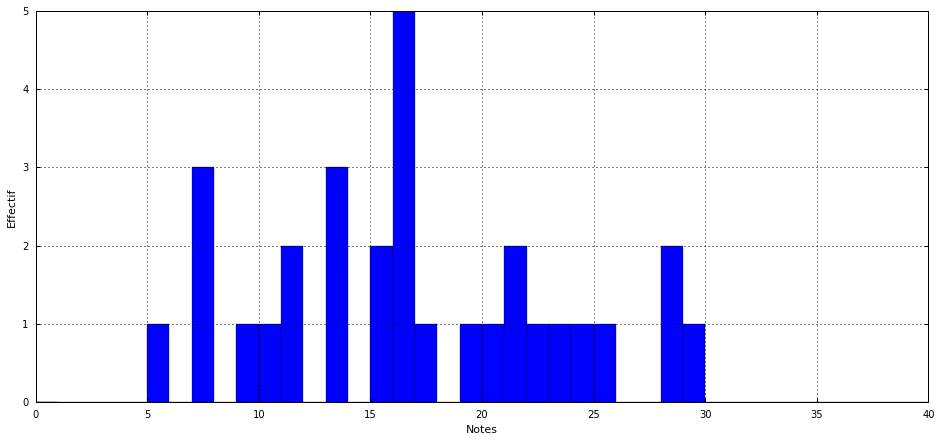

In [22]:
#notes_seules = notes[ds_name]
ax = notes[ds_name].hist(bins = barem[ds_name][0], range=(0,barem[ds_name][0]), figsize = (16,7), )
ax.set_xlabel("Notes")
ax.set_ylabel("Effectif")
#notes_seules.hist()

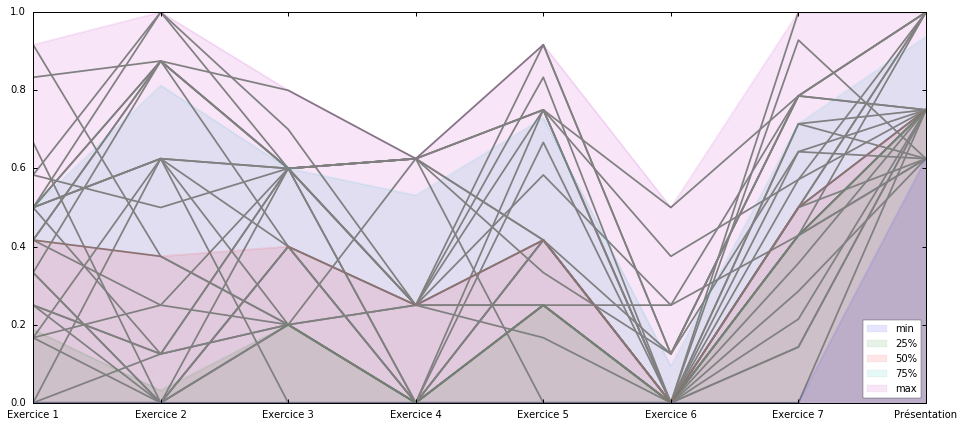

In [24]:
# Normalisation des notes de chaque exo
notes_exo_norm = notes[list_exo + autres_notes] / barem[list_exo + autres_notes].values[0,:]
#notes_exo_norm
ax = notes_exo_norm.T.plot(color = "gray", legend = False, figsize = (16, 7))
d_norm =  notes_exo_norm.describe()
d_norm.T[["min", "25%", "50%", "75%", "max"]].plot(ax=ax, kind="area", stacked = False, alpha=.1)

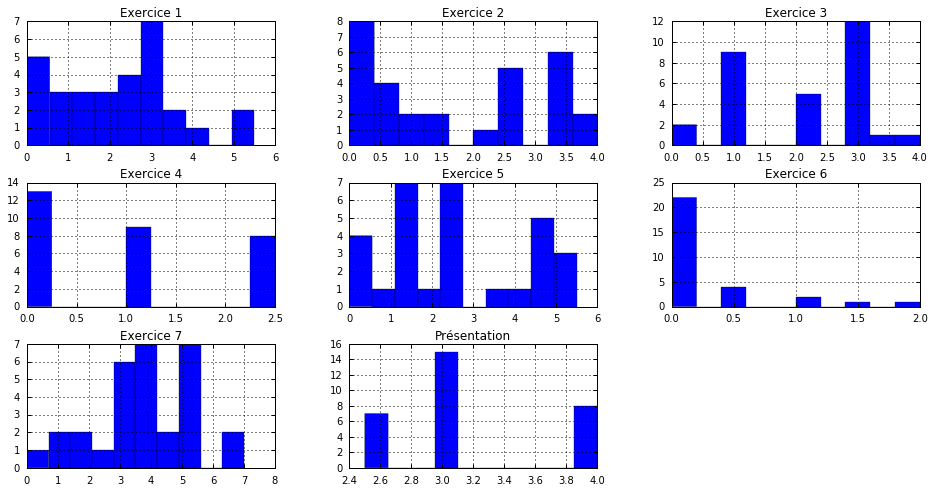

In [25]:
ax = notes[list_exo+autres_notes].hist(figsize = (16,8))

In [30]:
notes[notes["Exercice 4"] < 1].index

Index(['AHAMADI Faina', 'ALI Mardhuia', 'ALSENE ALI MADI Stela',
       'ANLI Emeline', 'CHANFI Nadhrati', 'HAMZA Samianti',
       'HOUMADI Mouslimati', 'HOUMADI Dhoirfia', 'LOUTOUFI Nachima',
       'MALIDE El-Anzize', 'SOILIHI Soifia', 'SOUFIANI Laila',
       'YOUSSOUF Sitirati'],
      dtype='object')

## Bilan à remplir